In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pywaffle import Waffle

## Data Wrangling

In [3]:
commas = pd.read_csv('Data/Comma Survey Data.txt', sep = '\t')

In [4]:
commas.columns = ['ID','sentence_1', 'heard_of_comma', 'care_about_comma','sentence_2','data_number','data_debate',
                 'grammar_important','gender','age_group','income_cat','education','region']

In [5]:
commas['education'].value_counts()

education
Bachelor degree                     344
Some college or Associate degree    295
Graduate degree                     276
High school degree                  100
Less than high school degree         11
Name: count, dtype: int64

In [6]:
# Get rid of any null values and merge two categories in one 'High scool'.
educ = commas['education'].dropna().apply(lambda x: 'High school' if 'school' in x else x)
# Change the name of some category.
educ = educ.replace('Some college or Associate degree', 'Some college').replace('Bachelor degree', "Bachelor's degree")
# Save the count of each category in the 'educ' variable.
educ = educ.value_counts().reindex(['Graduate degree', "Bachelor's degree", 'Some college', 'High school'])
educ

education
Graduate degree      276
Bachelor's degree    344
Some college         295
High school          111
Name: count, dtype: int64

In [7]:
# Data out of 100 for waffle
data = (educ/educ.sum()*100).apply(round)
print(educ/educ.sum()*100)
data["Bachelor's degree"] = 33 # To make the numbers add up
data.sum()

education
Graduate degree      26.900585
Bachelor's degree    33.528265
Some college         28.752437
High school          10.818713
Name: count, dtype: float64


100

## Waffle chart

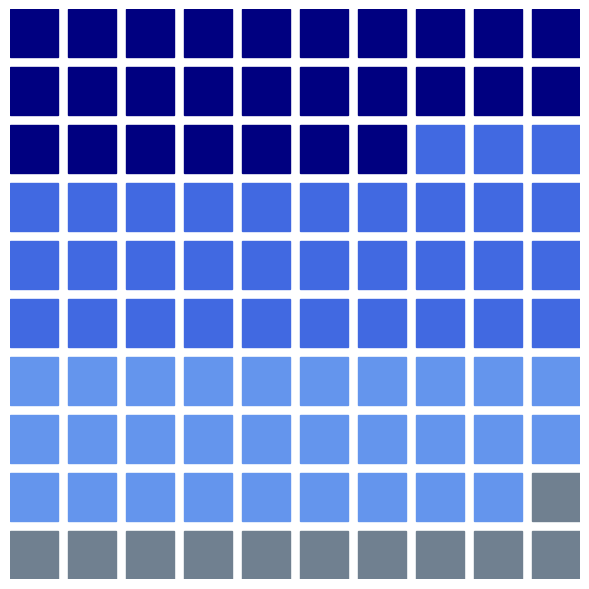

In [8]:
# Use 'plt.figure' to create the waffle chart.
colors=['navy', 'royalblue', 'cornflowerblue', 'slategrey']
fig = plt.figure(
    figsize = [6,6],
    FigureClass=Waffle,
    columns=10,
    values=list(data.values),
    colors=colors,
    font_size=10,
    vertical= True,
    starting_location = 'NW'
)

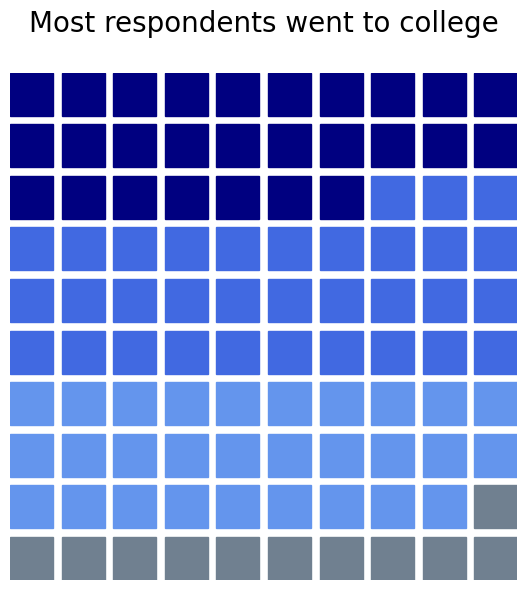

In [9]:
# Copy codes from before.
# Add title as an argument.
colors=['navy', 'royalblue', 'cornflowerblue', 'slategrey']
fig = plt.figure(
    figsize = [6,6],
    FigureClass=Waffle,
    columns=10,
    values=list(data.values),
    colors=colors,
    font_size=10,
    vertical= True,
    starting_location = 'NW',
    title={
        'label': "Most respondents went to college\n",
        'loc': 'center',
        'fontdict': {
            'fontsize': 20
        }
    },
)

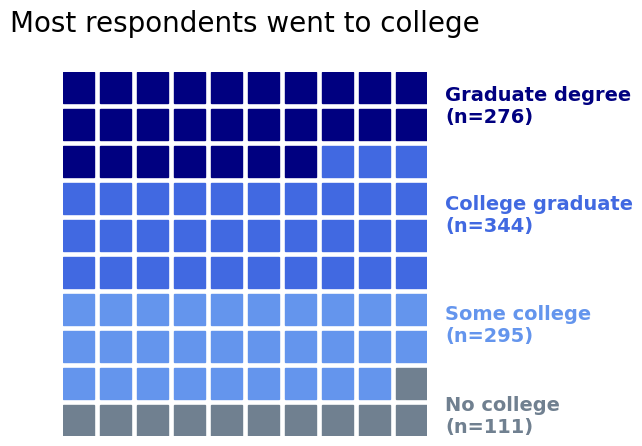

In [10]:
# Copy codes from before.
# Add the labels.
colors=['navy', 'royalblue', 'cornflowerblue', 'slategrey']
fig = plt.figure(
    figsize = [6,6],
    FigureClass=Waffle,
    columns=10,
    values=list(data.values),
    colors=colors,
    font_size=10,
    vertical= True,
    starting_location = 'NW',
    title={
        'label': "Most respondents went to college\n",
        'loc': 'center',
        'fontdict': {
            'fontsize': 20
        }
    },
)


# Calc values for labels
new_labels = ['Graduate degree', 'College graduate', 'Some college', 'No college']
labels = [new_labels[i] + '\n(n=' + str(educ.iloc[i]) + ')' for i in range(len(data))]
positions = [0.85, 0.55, 0.25, 0]
for i in range(len(labels)):
    plt.text(1.05, positions[i], labels[i], va = 'bottom', c = colors[i], weight = 'bold', fontsize = 14)
plt.savefig('Images/Waffle.png', bbox_inches = 'tight')
plt.show()

## Donut

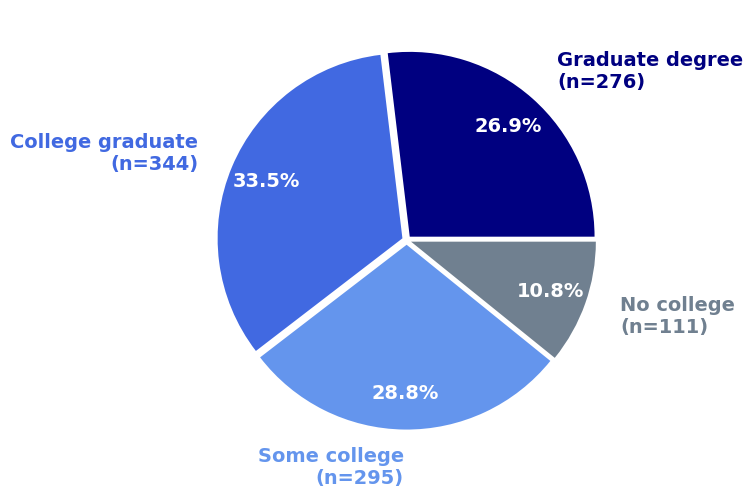

In [11]:
plt.figure(figsize = [6,6])
 
# Setting labels for items in the Chart
new_labels = ['Graduate degree', 'College graduate', 'Some college', 'No college']
labels = [new_labels[i] + '\n(n=' + str(educ.iloc[i]) + ')' for i in range(len(data))]
 
# Setting size in the Chart based on given values
sizes = educ.values
 
# colors
colors = ['navy', 'royalblue', 'cornflowerblue', 'slategrey']
# explosion
explode = (0.025, 0.025, 0.025, 0.025)
 
# Pie Chart
wedges, text, numbers = plt.pie(
    sizes, 
    colors=colors, 
    labels=labels,
    autopct='%1.1f%%', 
    pctdistance=0.8,
    explode=explode,
    textprops = {
        'fontsize':14, 
        'weight':'bold', 
        'color':'white'
    },
    labeldistance=1.2
)

# Change exterior label colors
for i in range(len(text)):
    text[i].set_color(colors[i])

plt.show()

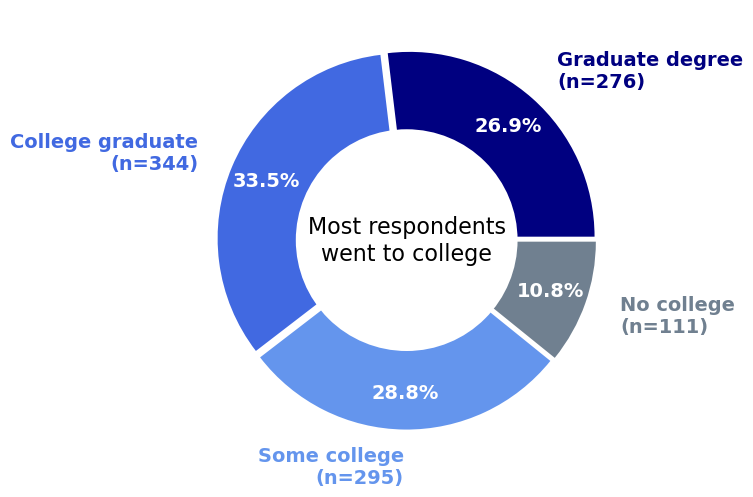

In [12]:
# Copy codes from before.
plt.figure(figsize = [6,6])
new_labels = ['Graduate degree', 'College graduate', 'Some college', 'No college']
labels = [new_labels[i] + '\n(n=' + str(educ.iloc[i]) + ')' for i in range(len(data))]
sizes = educ.values
colors = ['navy', 'royalblue', 'cornflowerblue', 'slategrey']
explode = (0.025, 0.025, 0.025, 0.025)

wedges, text, numbers = plt.pie(
    sizes, 
    colors=colors, 
    labels=labels,
    autopct='%1.1f%%', 
    pctdistance=0.8,
    explode=explode,
    textprops = {
        'fontsize':14, 
        'weight':'bold', 
        'color':'white'
    },
    labeldistance=1.2
)
for i in range(len(text)):
    text[i].set_color(colors[i])


# Draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
 
# Add a circle in the Pie chart
fig.gca().add_artist(centre_circle)
 
# Add title of chart in the center
plt.text(0, 0,'Most respondents\nwent to college', horizontalalignment = 'center',
         verticalalignment = 'center', fontsize = 16)
 
plt.savefig('Images/Donut.png',bbox_inches = 'tight', facecolor='white')

plt.show()